In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
# # import data
# df1 = pd.read_csv('./data-crawling/digital-supply-chain-details.csv')
# df2 = pd.read_csv('./data-crawling/supply-chain-technology-details.csv')

# # concat data frames
# frames = pd.concat([df1, df2], ignore_index=True)

# # remove column '_id'
# frames = frames.drop(['_id'], axis=1)

# # remove duplicated rows
# frames = frames.drop_duplicates()

# # reset index
# frames = frames.reset_index(drop=True)

In [3]:
# frames.info()

In [4]:
# frames

In [5]:
# # export to csv
# frames.to_csv('./data-crawling/raw-data.csv', index=False)

In [23]:
# publisher = pd.read_csv('./data-crawling/raw-data.csv', usecols=['publihser'])
# publisher

In [4]:
def search_year(text):
    """get published year from text"""
    all_years = ['1990', '1991', '1992', '1993', '1994', '1995', 
                 '1996', '1997', '1998', '1999', '2000', '2001',
                 '2002', '2003', '2004', '2005', '2006', '2007',
                 '2008', '2009', '2010', '2011', '2012', '2013',
                 '2014', '2015', '2016', '2017', '2018', '2019',
                 '2020', '2021']
    for year in all_years:
        y = re.search(year, text)
        if y:
            return year

In [5]:
def search_publisher(text):
    """get publisher's name from text"""
    publisher = []
    text = text.lower()
    items = text.split()
    for elem in items:
        if elem.isalpha():
            publisher.append(elem)
    
    return ' '.join(publisher)

In [24]:
# sample = [publisher['publihser'][i].lower() for i in range(10)]
# sample

['technovation (2020) 96-97',
 'supply chain forum (2020) 21(3) 139-157',
 'computers in industry (2018) 97 157-177',
 'mathematics (2019) 7(12)',
 'production planning and control (2020)',
 'journal of modelling in management (2020) 15(1) 297-317',
 'benchmarking (2019)',
 'international journal of supply chain management (2020) 9(3) 843-849',
 'international journal of supply chain management (2020) 9(4) 1074-1080',
 'journal of manufacturing technology management (2019) 31(5) 887-933']

In [7]:
# for s in sample:
#     year = search_year(s)
#     p = search_publisher(s)
#     print(p, year)

technovation 2020
supply chain forum 2020
computers in industry 2018
mathematics 2019
production planning and control 2020
journal of modelling in management 2020
benchmarking 2019
international journal of supply chain management 2020
international journal of supply chain management 2020
journal of manufacturing technology management 2019


In [8]:
# # Apply function search_year and search_publisher to dataframe

# splitted_data = []

# for p in publisher['publihser']:
#     publish = search_publisher(p)
#     year = search_year(p)
#     splitted_data.append([publish, year])

In [10]:
# splitted_data

In [11]:
# # create new DataFrame
# new_df = pd.DataFrame(splitted_data, columns=['publisher', 'year_published'])

# # drop NA row
# new_df = new_df.dropna()

# # reset index
# new_df = new_df.reset_index(drop=True)

# # # export to new csv file
# # new_df.to_csv('./data-crawling/publisher-year.csv', index=False)

In [12]:
# new_df

,publisher,year_published
0,technovation,2020
1,supply chain forum,2020
2,computers in industry,2018
3,mathematics,2019
4,production planning and control,2020
...,...,...
3530,ekonomska istrazivanja,2012
3531,technovation,2006
3532,cogent business and management,2019
3533,international journal of supply chain management,2018


In [20]:
# # remove row contains ''
# test_df = new_df.drop(new_df.index[new_df['publisher'] == ''], inplace = True)

In [199]:
# test_df.info()
# # new_df.info()

In [36]:
df = pd.read_csv('./data-crawling/only-publisher.csv')
# df['year_published']

In [37]:
unique_years = df['year_published'].value_counts() #.sort_values(ascending=True)
unique_years

2020    679
2019    578
2018    371
2017    319
2016    236
2015    193
2014    154
2012    119
2013    107
2011     97
2010     92
2008     76
2007     66
2009     57
2005     54
2004     45
2006     44
2001     42
2003     31
2021     29
2000     29
2002     24
1999     17
1997     10
1998      6
1996      5
1995      5
1990      4
1993      3
1991      3
1994      1
Name: year_published, dtype: int64

In [39]:
year_trends = df['year_published'].value_counts().index.tolist()
value_trends = df['year_published'].value_counts().tolist()

In [58]:
type(year_trends[1])

int

In [40]:
trend_dict = {}
for i in range(len(year_trends)):
    trend_dict[year_trends[i]] = value_trends[i]

In [43]:
# sorting from older year
# trend_items = trend_dict.items()
# trend_dict = sorted(trend_items)

AttributeError: 'list' object has no attribute 'items'

<AxesSubplot:>

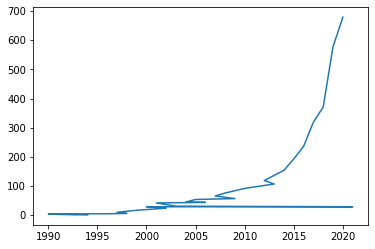

In [38]:
unique_years.plot()

<AxesSubplot:>

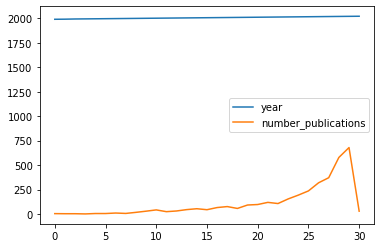

In [61]:
td = pd.DataFrame(trend_dict, columns=['year', 'number_publications'])

In [65]:
td.to_csv('./data-crawling/publication-year-by-year.csv', index=False)

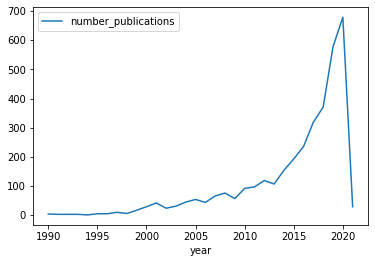

<Figure size 432x288 with 0 Axes>

In [196]:
ax = plt.gca()
td.plot(kind='line', x='year', y='number_publications', ax=ax)
plt.show()
plt.savefig('./images/trends-by-year.png')

In [28]:
# new_df.to_csv('./data-crawling/only-publisher.csv', index=False)

In [66]:
unique_publisher = df['publisher'].value_counts()[:10].sort_values(ascending=True)
unique_publisher

Computers and Industrial Engineering                 25
Production Planning and Control                      29
IEEE Access                                          34
Supply Chain Management                              37
SSRN Electronic Journal                              45
Journal of Cleaner Production                        47
International Journal of Production Economics        53
Sustainability                                       57
International Journal of Production Research         62
International Journal of Supply Chain Management    119
Name: publisher, dtype: int64

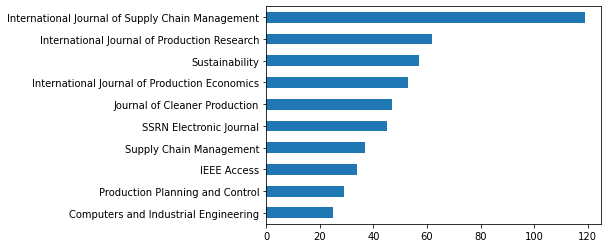

In [198]:
unique_publisher.plot(kind='barh')
plt.savefig('./images/top-ten-publishers.png')

In [70]:
publisher_list = df['publisher'].value_counts()[:10].sort_values(ascending=True).index.tolist()
publisher_value = df['publisher'].value_counts()[:10].sort_values(ascending=True).tolist()

[25, 29, 34, 37, 45, 47, 53, 57, 62, 119]

In [71]:
top10_dict = {}
for i in range(len(publisher_list)):
    top10_dict[publisher_list[i]] = publisher_value[i]

top10_dict

{'Computers and Industrial Engineering': 25,
 'Production Planning and Control': 29,
 'IEEE Access': 34,
 'Supply Chain Management': 37,
 'SSRN Electronic Journal': 45,
 'Journal of Cleaner Production': 47,
 'International Journal of Production Economics': 53,
 'Sustainability': 57,
 'International Journal of Production Research': 62,
 'International Journal of Supply Chain Management': 119}

In [88]:
d = [top10_dict]
top_df = pd.DataFrame.from_dict(d)
top_df = pd.melt(top_df).rename(columns={
    'variable':'publisher',
    'value': 'number_publications'})
top_df

,publisher,number_publications
0,Computers and Industrial Engineering,25
1,Production Planning and Control,29
2,IEEE Access,34
3,Supply Chain Management,37
4,SSRN Electronic Journal,45
5,Journal of Cleaner Production,47
6,International Journal of Production Economics,53
7,Sustainability,57
8,International Journal of Production Research,62
9,International Journal of Supply Chain Management,119


In [90]:
top_df.to_csv('./data-crawling/top-ten-publisher.csv', index=False)

<AxesSubplot:ylabel='publisher'>

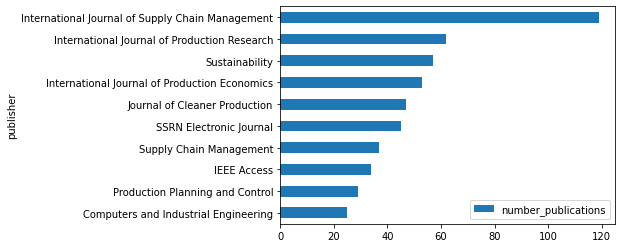

In [92]:
# # how to plot from dictionary
# plt.barh(*zip(*top10_dict.items()))
# plt.show()

top_df.plot(kind='barh', x='publisher', y='number_publications')


In [34]:
for i in unique_publisher:
    print(i, 'y')

25 y
29 y
34 y
37 y
45 y
47 y
53 y
57 y
62 y
119 y


In [93]:
top_publisher = df['publisher'].value_counts()[:10].sort_values(ascending=True).index.tolist()

In [94]:
top_publisher

['Computers and Industrial Engineering',
 'Production Planning and Control',
 'IEEE Access',
 'Supply Chain Management',
 'SSRN Electronic Journal',
 'Journal of Cleaner Production',
 'International Journal of Production Economics',
 'Sustainability',
 'International Journal of Production Research',
 'International Journal of Supply Chain Management']

In [96]:
all_top = []
for tp in top_publisher:
    data = df[df['publisher'] == tp]
    all_top.append(data)

In [97]:
for d in range(len(all_top)):
    all_top[d] = all_top[d].reset_index(drop=True)

In [105]:
len(all_top)

10

In [114]:
all_top[0]['year_published'].value_counts().sort_values(ascending=True)
# all_top[0]['publisher'].value_counts().index.tolist()
# len(all_top[9])

2015     1
2013     1
2012     1
2011     1
2018     1
2017     1
2020     9
2019    10
Name: year_published, dtype: int64

In [116]:
display_data = {}
for i in range(len(all_top)):
    year = all_top[i]['year_published'].value_counts().sort_values(ascending=True).index.tolist()
    year_freq = all_top[i]['year_published'].value_counts().sort_values(ascending=True).tolist()
    publsh = all_top[i]['publisher'].value_counts().index.tolist()
    year_data = {}
    for i in range(len(year)):
        year_data[year[i]] = year_freq[i]
    display_data[publsh[0]] = year_data

In [117]:
display_data

{'Computers and Industrial Engineering': {2015: 1,
  2013: 1,
  2012: 1,
  2011: 1,
  2018: 1,
  2017: 1,
  2020: 9,
  2019: 10},
 'Production Planning and Control': {2014: 1,
  2012: 1,
  2007: 1,
  2021: 1,
  2015: 2,
  2019: 2,
  2016: 3,
  2017: 4,
  2020: 14},
 'IEEE Access': {2017: 1, 2018: 3, 2019: 13, 2020: 17},
 'Supply Chain Management': {2017: 1,
  2015: 1,
  2013: 1,
  2012: 1,
  2010: 1,
  2009: 1,
  2005: 1,
  2004: 1,
  2002: 1,
  2018: 2,
  2008: 2,
  2014: 3,
  2007: 3,
  2016: 4,
  2020: 5,
  2019: 9},
 'SSRN Electronic Journal': {2005: 1,
  2016: 2,
  2013: 2,
  2012: 2,
  2011: 2,
  2015: 4,
  2017: 5,
  2014: 5,
  2020: 7,
  2018: 7,
  2019: 8},
 'Journal of Cleaner Production': {2021: 1,
  2016: 1,
  2015: 1,
  2013: 1,
  2010: 1,
  2008: 1,
  2017: 8,
  2019: 10,
  2018: 10,
  2020: 13},
 'International Journal of Production Economics': {2013: 1,
  2007: 1,
  2002: 1,
  2012: 2,
  2011: 2,
  2008: 2,
  2009: 3,
  2018: 4,
  2021: 5,
  2015: 5,
  2019: 6,
  2017: 

In [118]:
dd_df = pd.DataFrame.from_dict(display_data)

In [124]:
dd_df = dd_df.sort_index()

In [182]:
dd_df

,Computers and Industrial Engineering,Production Planning and Control,IEEE Access,Supply Chain Management,SSRN Electronic Journal,Journal of Cleaner Production,International Journal of Production Economics,Sustainability,International Journal of Production Research,International Journal of Supply Chain Management
2002,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2004,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN
2007,NaN,1.0,NaN,3.0,NaN,NaN,1.0,NaN,1.0,NaN
2008,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN
2009,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,2.0,NaN
2010,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN
2011,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN
2012,1.0,1.0,NaN,1.0,2.0,NaN,2.0,NaN,2.0,NaN
2013,1.0,NaN,NaN,1.0,2.0,1.0,1.0,NaN,3.0,1.0


In [135]:
len(dd_df)

18

In [148]:
def SerToArr(series):
    return [series.index, series.to_numpy()]

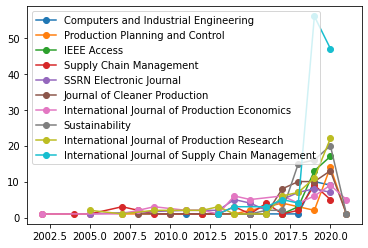

In [195]:
for column in dd_df.columns:
    series = pd.Series(dd_df[column])
    plt.plot(*SerToArr(series.dropna()), linestyle='-', marker='o', label=column)
#     print(column)
# plt.figure(figsize=(200,100)).gca()
plt.legend()
plt.show()

In [159]:
for column in dd_df.columns:
    print(column)

Computers and Industrial Engineering
Production Planning and Control
IEEE Access
Supply Chain Management
SSRN Electronic Journal
Journal of Cleaner Production
International Journal of Production Economics
Sustainability
International Journal of Production Research
International Journal of Supply Chain Management


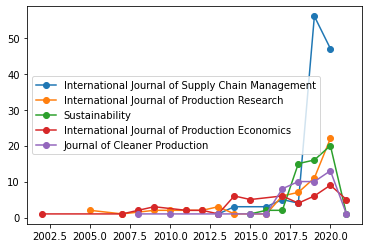

In [194]:
series1 = pd.Series(dd_df[dd_df.columns[9]])
series2 = pd.Series(dd_df[dd_df.columns[8]])
series3 = pd.Series(dd_df[dd_df.columns[7]])
series4 = pd.Series(dd_df[dd_df.columns[6]])
series5 = pd.Series(dd_df[dd_df.columns[5]])

# print(series)
plt.plot(*SerToArr(series1.dropna()), linestyle='-', marker='o', label=dd_df.columns[9])
plt.plot(*SerToArr(series2.dropna()), linestyle='-', marker='o', label=dd_df.columns[8])
plt.plot(*SerToArr(series3.dropna()), linestyle='-', marker='o', label=dd_df.columns[7])
plt.plot(*SerToArr(series4.dropna()), linestyle='-', marker='o', label=dd_df.columns[6])
plt.plot(*SerToArr(series5.dropna()), linestyle='-', marker='o', label=dd_df.columns[5])

plt.legend()
plt.show()